### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
keeper_data = pd.read_csv("keepers_list.csv")

In [3]:
keeper_data.head()

,Unnamed: 0,Player,Pos,Age,Match_played,Starts,Minutes_played,shots_on_target_against,Saves,Save%,win,draw,loss,clean_sheet,clean_sheet%
0,0,Emiliano Martínez,GK,29,7,7,690,13,6,53.8,4,2,1,3,42.9
1,1,Hugo Lloris,GK,35,6,6,570,24,17,83.3,5,1,0,1,16.7
2,2,Steve Mandanda,GK,37,1,1,90,3,2,66.7,0,0,1,0,0.0
3,3,Dominik Livaković,GK,27,7,7,690,31,24,80.6,2,4,1,2,28.6
4,4,Yassine Bounou,GK,31,6,6,570,11,7,54.5,2,2,2,3,50.0


In [5]:
print(keeper_data.describe())

       Unnamed: 0        Age  Match_played     Starts  Minutes_played  \
count   41.000000  41.000000     41.000000  41.000000       41.000000   
mean    20.000000  30.073171      3.195122   3.121951      288.024390   
std     11.979149   3.894806      1.600305   1.691081      163.458326   
min      0.000000  22.000000      1.000000   0.000000       11.000000   
25%     10.000000  28.000000      2.000000   2.000000      175.000000   
50%     20.000000  30.000000      3.000000   3.000000      270.000000   
75%     30.000000  33.000000      4.000000   4.000000      360.000000   
max     40.000000  37.000000      7.000000   7.000000      690.000000   

       shots_on_target_against      Saves       Save%        win       draw  \
count                41.000000  41.000000   40.000000  41.000000  41.000000   
mean                 12.243902   7.975610   67.722500   1.195122   0.731707   
std                   7.582152   5.707398   14.196379   1.187845   0.866729   
min                   0.00

In [6]:
print(keeper_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               41 non-null     int64  
 1   Player                   41 non-null     object 
 2   Pos                      41 non-null     object 
 3   Age                      41 non-null     int64  
 4   Match_played             41 non-null     int64  
 5   Starts                   41 non-null     int64  
 6   Minutes_played           41 non-null     int64  
 7   shots_on_target_against  41 non-null     int64  
 8   Saves                    41 non-null     int64  
 9   Save%                    40 non-null     float64
 10  win                      41 non-null     int64  
 11  draw                     41 non-null     int64  
 12  loss                     41 non-null     int64  
 13  clean_sheet              41 non-null     int64  
 14  clean_sheet%             40 

In [16]:
# Check for any missing values in the dataset
print(keeper_data.isnull().sum())

Unnamed: 0                 0
Player                     0
Pos                        0
Age                        0
Match_played               0
Starts                     0
Minutes_played             0
shots_on_target_against    0
Saves                      0
Save%                      1
win                        0
draw                       0
loss                       0
clean_sheet                0
clean_sheet%               1
dtype: int64


In [17]:
keeper_data[keeper_data['Save%'].isnull()]

,Unnamed: 0,Player,Pos,Age,Match_played,Starts,Minutes_played,shots_on_target_against,Saves,Save%,win,draw,loss,clean_sheet,clean_sheet%
10,10,Wéverton,GK,34,1,0,11,0,0,NaN,0,0,0,0,NaN


In [7]:
keeper_data.columns

Index(['Unnamed: 0', 'Player', 'Pos', 'Age', 'Match_played', 'Starts',
       'Minutes_played', 'shots_on_target_against', 'Saves', 'Save%', 'win',
       'draw', 'loss', 'clean_sheet', 'clean_sheet%'],
      dtype='object')

In [4]:
# Replace missing Save% values with 0
keeper_data['Save%'].fillna(0, inplace=True)

In [19]:
# Confirm that there are no missing values in the Save% column
keeper_data[keeper_data['Save%'].isnull()]

,Unnamed: 0,Player,Pos,Age,Match_played,Starts,Minutes_played,shots_on_target_against,Saves,Save%,win,draw,loss,clean_sheet,clean_sheet%


In [5]:
# Replace missing clean_sheet% values with 0
keeper_data['clean_sheet%'].fillna(0, inplace=True)

In [21]:
# Confirm that there are no missing values in the clean_sheet%  column
keeper_data[keeper_data['clean_sheet%'].isnull()]

,Unnamed: 0,Player,Pos,Age,Match_played,Starts,Minutes_played,shots_on_target_against,Saves,Save%,win,draw,loss,clean_sheet,clean_sheet%


In [6]:
# Drop the Unnamed: 0 column
keeper_data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
keeper_data

,Player,Pos,Age,Match_played,Starts,Minutes_played,shots_on_target_against,Saves,Save%,win,draw,loss,clean_sheet,clean_sheet%
0,Emiliano Martínez,GK,29,7,7,690,13,6,53.8,4,2,1,3,42.9
1,Hugo Lloris,GK,35,6,6,570,24,17,83.3,5,1,0,1,16.7
2,Steve Mandanda,GK,37,1,1,90,3,2,66.7,0,0,1,0,0.0
3,Dominik Livaković,GK,27,7,7,690,31,24,80.6,2,4,1,2,28.6
4,Yassine Bounou,GK,31,6,6,570,11,7,54.5,2,2,2,3,50.0
5,Munir,GK,33,1,1,90,3,3,100.0,1,0,0,1,100.0
6,Andries Noppert,GK,28,5,5,480,22,18,86.4,3,2,0,2,40.0
7,Jordan Pickford,GK,28,5,5,450,11,7,72.7,3,1,1,3,60.0
8,Alisson,GK,29,4,4,379,7,5,71.4,3,1,0,2,50.0
9,Ederson,GK,28,1,1,90,3,2,66.7,0,0,1,0,0.0


In [8]:
keeper_data.to_csv("final_keepers_list.csv")

### Data Analysis

In [24]:
# Get the number of goalkeepers with a Save percentage greater than 70%
above_70_save_percent = keeper_data[keeper_data['Save%'] > 70].count()['Player']
print(f"Number of goalkeepers with Save% above 70: {above_70_save_percent}")

Number of goalkeepers with Save% above 70: 17


In [25]:
# Get the number of goalkeepers with a Save percentage greater than 70% and more than 2 matches played
above_70_save_percent = keeper_data[(keeper_data['Save%'] > 70) & (keeper_data['Match_played'] > 2)].count()['Player']
print(f"Number of goalkeepers with Save% above 70 and more than 2 matches played: {above_70_save_percent}")

Number of goalkeepers with Save% above 70 and more than 2 matches played: 13


In [34]:
# Get the goalkeepers with Save% above 70 and more than 2 matches played
goalkeepers = keeper_data[(keeper_data['Save%'] > 70) & (keeper_data['Match_played'] > 2)]

# Sort the goalkeepers by Save% in descending order
sorted_goalkeepers = goalkeepers.sort_values(by='Save%', ascending=False)

# Print the names of the goalkeepers
print("Goalkeepers with Save% above 70 and more than 2 matches played, ordered by Save%:")
print("Rank | Player Name          | Save%")
print("-----|----------------------|-------")
for i, (index, row) in enumerate(sorted_goalkeepers.iterrows(), 1):
    name = row['Player']
    save_percent = row['Save%']
    print(f"{i:4d} | {name:20s} | {save_percent:6.1f}")


Goalkeepers with Save% above 70 and more than 2 matches played, ordered by Save%:
Rank | Player Name          | Save%
-----|----------------------|-------
   1 | Aimen Dahmen         |   90.0
   2 | Andries Noppert      |   86.4
   3 | Sergio Rochet        |   85.7
   4 | Shūichi Gonda        |   84.2
   5 | Hugo Lloris          |   83.3
   6 | Wojciech Szczęsny    |   82.1
   7 | Thibaut Courtois     |   81.8
   8 | Dominik Livaković    |   80.6
   9 | Mohammed Al-Owais    |   78.9
  10 | Matt Turner          |   75.0
  11 | Jordan Pickford      |   72.7
  12 | Kasper Schmeichel    |   72.7
  13 | Alisson              |   71.4


In [35]:
# Calculate the average age
average_age = keeper_data['Age'].mean()

# Print the average age
print(f"Average age of goalkeepers: {average_age:.2f}")

Average age of goalkeepers: 30.07


In [38]:
# Sort the data by the clean_sheet column in descending order
top_5_clean_sheet = keeper_data.sort_values(by='clean_sheet', ascending=False).head(5)

# Print the top 5 goalkeepers with the highest clean_sheet values
print("Rank | Player Name | Clean Sheet%")
print("-----|----------------------|--------------")
for i, (index, row) in enumerate(top_5_clean_sheet.iterrows(), 1):
    name = row['Player']
    clean_sheet_percent = row['clean_sheet%']
    print(f"{i:4d} | {name:20s} | {clean_sheet_percent:6.1f}")

Rank | Player Name | Clean Sheet%
-----|----------------------|--------------
   1 | Emiliano Martínez    |   42.9
   2 | Yassine Bounou       |   50.0
   3 | Jordan Pickford      |   60.0
   4 | Aimen Dahmen         |   66.7
   5 | Matt Turner          |   50.0


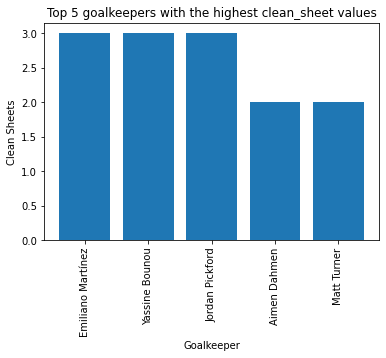

In [39]:

# Plot the top 5 goalkeepers with the highest clean_sheet values
plt.bar(top_5_clean_sheet['Player'], top_5_clean_sheet['clean_sheet'])
plt.xlabel('Goalkeeper')
plt.ylabel('Clean Sheets')
plt.title('Top 5 goalkeepers with the highest clean_sheet values')
plt.xticks(rotation=90)
plt.show()